In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
df = pd.read_csv('cleanData5.csv')

In [13]:
X = df[['1st_College_Semester_GPA', 'SARADAP_PIDM', 'AGE', 'MILES_FROM_TTU',
          'Hours_Transferred_In', 'HIGH_SCHOOL_GPA', 'HOUSING', 'ORIENTATION_SESSION',
          'ACT_COMPOSITE', 'Pell_Eligible', 'First_Gen_Status', 'Appalachian_County',
          'College_Change', 'Major_Change', 'gender_0', 'female', 'male', 'gender_N',
          'college_of_AH', 'college_of_AS', 'college_of_BA', 'college_of_ED',
          'college_of_EN', 'college_of_FA', 'college_of_IP', 'college_of_IS', 'college_of_NU']]

Y = df['Spring_1_Retention']

X_names = ["1st_College_Semester_GPA", "SARADAP_PIDM", "AGE", 'MILES_FROM_TTU',
          'Hours_Transferred_In', 'HIGH_SCHOOL_GPA', 'HOUSING', 'ORIENTATION_SESSION',
          'ACT_COMPOSITE', 'Pell_Eligible', 'First_Gen_Status', 'Appalachian_County',
          'College_Change', 'Major_Change', 'gender_0', 'female', 'male', 'gender_N',
          'college_of_AH', 'college_of_AS', 'college_of_BA', 'college_of_ED',
          'college_of_EN', 'college_of_FA', 'college_of_IP', 'college_of_IS', 'college_of_NU']

Y_names = ['Spring_1_Retention_Yes', "Spring_1_Retention_No"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.60)

In [15]:
classifier = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,

    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,

    class_weight=None,
    ccp_alpha=0.0
    )
    
model = classifier.fit(X_train, y_train)

model.feature_importances_: [0.40670229 0.11337364 0.0206772  0.08424476 0.02212132 0.08931235
 0.00889327 0.05752629 0.0527474  0.01513451 0.00616206 0.01205017
 0.         0.05401887 0.         0.00482406 0.00384007 0.
 0.00730714 0.00447515 0.00979071 0.0043195  0.00210427 0.00246724
 0.00315641 0.00540263 0.0093487 ]


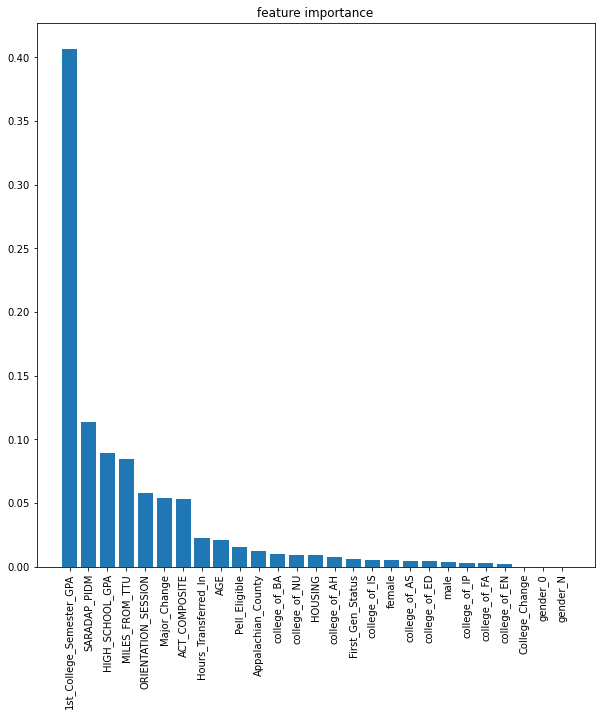

In [17]:
importances = model.feature_importances_

print("model.feature_importances_: {}".format(importances))

indices = np.argsort(importances)[::-1]

names = [X_names[i] for i in indices]

fig = plt
fig.figure(figsize=(10,10))
fig.title("feature importance")
fig.bar(range(X_train.shape[1]), importances[indices])
fig.xticks(range(X_train.shape[1]), names, rotation=90)

fig.savefig("Decision_Tree_feature_importances.png")

In [18]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       278
           1       0.94      0.94      0.94      2361

    accuracy                           0.90      2639
   macro avg       0.72      0.72      0.72      2639
weighted avg       0.89      0.90      0.89      2639



In [19]:
def conf_matrix(y_pred_, y_test_):
    
    confusion_matrix = pd.crosstab(y_pred_, y_test_, rownames=['Predicted'], colnames=['Actual'])

    print (confusion_matrix)

    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    print()
    print("Metrics based on the Confusion Matrix")
    print()

    Accuracy    = round(100*((TP+TN)/(TP+TN+FP+FN)),2)
    Sensitivity = round(100*TP/(TP+FN),2)
    Specificity = round(100*TN/(FP+TN),2)
    PPV         = round(100*TP/(TP+FP),2)
    NPV         = round(100*TN/(TN+FN),2)
    FDR         = round(100*FP/(TP+FP),2)
    FOR         = round(100*FN/(TN+FN),2) 

    print("Accuracy:", Accuracy, "%")
    print("Sensitivity:", Sensitivity, "%")
    print("Specificity:", Specificity, "%")
    print("Positive Predictive Value:", PPV, "%")
    print("Negative Predictive Value:", NPV, "%")
    print("False Discovery Rate:", FDR, "%")
    print("False Omission Rate:", FOR, "%")

In [20]:
conf_matrix (y_pred, y_test)

Actual       0     1
Predicted           
0          139   138
1          139  2223

Metrics based on the Confusion Matrix

Accuracy: 89.5 %
Sensitivity: 94.16 %
Specificity: 50.0 %
Positive Predictive Value: 94.12 %
Negative Predictive Value: 50.18 %
False Discovery Rate: 5.88 %
False Omission Rate: 49.82 %
